In [9]:
import pandas as pd
pd.options.mode.chained_assignment = None
df = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test1.csv')
df_kaggle = pd.read_csv('data/test2.csv')

In [2]:
df.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v776,v777,v778,v779,v780,v781,v782,v783,v784,label
0,1,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,6
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,3,0,0,0,0,0,0,0,1,1,...,7,1,0,0,0,0,0,0,0,4
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [7]:
df.dtypes

id       int64
v1       int64
v2       int64
v3       int64
v4       int64
         ...  
v781     int64
v782     int64
v783     int64
v784     int64
label    int64
Length: 786, dtype: object

In [21]:
X = df.loc[:, "v1":"v784"]
Y = df.loc[:, "label"]
label_mapping = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

In [16]:
Y.value_counts()

label
6    3078
1    3042
9    3025
8    3017
7    3012
5    2988
2    2986
4    2974
0    2957
3    2921
Name: count, dtype: int64

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, mean_absolute_error, accuracy_score

import xgboost as xgb

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state = 0)
print(Y_train.value_counts())
print(Y_test.value_counts())

label
6    2155
1    2129
9    2117
8    2112
7    2108
5    2092
2    2090
4    2082
0    2070
3    2045
Name: count, dtype: int64
label
6    923
1    913
9    908
8    905
7    904
5    896
2    896
4    892
0    887
3    876
Name: count, dtype: int64


In [22]:
cls_1 = xgb.XGBClassifier(objective="multi:softmax",
                          tree_method="exact",
                          eval_metric="mlogloss",
                          random_state = 0)

cls_1.fit(X_train, Y_train)
Y_pred = cls_1.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
Y_pred_train = cls_1.predict(X_train)
print("Train Accuracy:", accuracy_score(Y_train, Y_pred_train))

Accuracy: 0.8837777777777778


In [23]:
cls_1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', predictor=None, ...)

In [24]:
# Evaluate F1-score
f1_scores = f1_score(Y_test, Y_pred, average=None)
macro_f1 = f1_score(Y_test, Y_pred, average='macro')

print("F1-scores for each class:", f1_scores)
print("Macro-average F1-score:", macro_f1)

F1-scores for each class: [0.82166302 0.98179812 0.81363386 0.88672769 0.80404267 0.96446701
 0.69084821 0.94569391 0.97291321 0.95479603]
Macro-average F1-score: 0.8836583743640307


Confusion Matrix:
[[751   1  13  26   5   1  86   0   4   0]
 [  3 890   3  12   3   0   2   0   0   0]
 [ 19   2 740  11  69   0  53   0   2   0]
 [ 36   4  10 775  29   0  22   0   0   0]
 [  0   0  70  25 716   0  77   0   4   0]
 [  0   0   0   1   0 855   0  26   6   8]
 [130   1  83  20  64   0 619   0   6   0]
 [  0   0   0   0   0   8   0 862   2  32]
 [  1   1   4   1   3   3  10   2 880   0]
 [  1   1   0   1   0  10   0  29   0 866]]


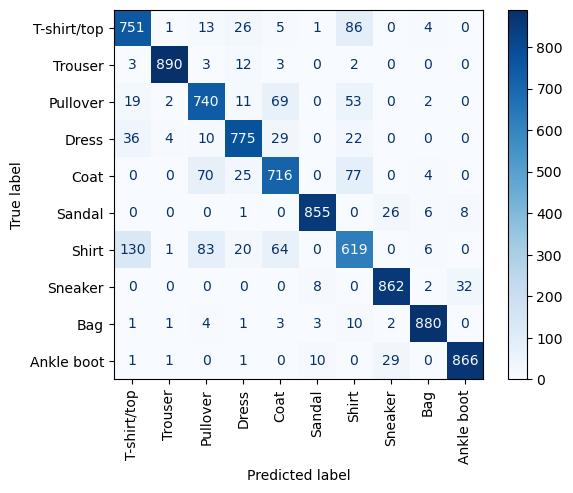

In [26]:
# Evaluate confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred)

print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_mapping)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.show()

In [33]:
cls_1 = xgb.XGBClassifier(max_depth = 15,
                          n_estimators = 800,
                          learning_rate = 0.3,
                          objective="multi:softmax",
                          tree_method="hist",
                          eval_metric="mlogloss",
                          reg_lambda = 100,
                          min_child_weight = 0.1,
                          random_state = 0)

cls_1.fit(X_train, Y_train)
Y_pred = cls_1.predict(X_test)
print("Validation Accuracy:", accuracy_score(Y_test, Y_pred))
Y_pred_train = cls_1.predict(X_train)
print("Train Accuracy:", accuracy_score(Y_train, Y_pred_train))

Accuracy: 0.8834444444444445
Train Accuracy: 1.0
